In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv(r'/Users/user/Downloads/tm2018.csv', sep=",")
df2 = pd.read_csv(r'/Users/user/Downloads/tm2019.csv', sep=",")
df3 = pd.read_csv(r'/Users/user/Downloads/tm2020.csv', sep=",")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
##Combine DataSets

dfs = [df1, df2, df3]

df = pd.concat(dfs, axis=0,ignore_index=True)
df

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,PlateLocHeight.Hot,radius,Swing,In_Hot_Zone,In_Strike_Zone,HitterHotColdPM,HotColdPoints,cluster,clusterSC,spin_eff_release_est
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,1,2/28/18,13:35:29,1,1,"Gubelman, Jordan",1000017258,Right,...,NaN,NaN,False,NaN,True,NaN,NaN,1.0,1.0,98.747656
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2,2/28/18,13:35:44,1,2,"Gubelman, Jordan",1000017258,Right,...,NaN,NaN,True,NaN,True,NaN,NaN,1.0,4.0,99.919364
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3,2/28/18,13:36:20,2,1,"Gubelman, Jordan",1000017258,Right,...,NaN,NaN,True,NaN,True,NaN,NaN,1.0,4.0,97.019042
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,4,2/28/18,13:36:57,3,1,"Gubelman, Jordan",1000017258,Right,...,NaN,NaN,False,NaN,False,NaN,NaN,1.0,4.0,96.977944
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5,2/28/18,13:37:17,3,2,"Gubelman, Jordan",1000017258,Right,...,NaN,NaN,True,NaN,True,NaN,NaN,1.0,1.0,97.509975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476327,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,316,3/6/20,16:15:05,3,1,"Domecq, Derek",1000049572,Left,...,NaN,NaN,False,NaN,True,NaN,NaN,3.0,3.0,93.789886
476328,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,317,3/6/20,16:15:23,3,2,"Domecq, Derek",1000049572,Left,...,NaN,NaN,False,NaN,False,NaN,NaN,5.0,3.0,17.915001
476329,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,318,3/6/20,16:15:41,3,3,"Domecq, Derek",1000049572,Left,...,NaN,NaN,False,NaN,True,NaN,NaN,1.0,4.0,91.676555
476330,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319,3/6/20,16:16:04,3,4,"Domecq, Derek",1000049572,Left,...,NaN,NaN,True,NaN,True,NaN,NaN,1.0,5.0,89.498040


In [4]:
df['PlayID']

0          20180228-TaylorStadium-1 01( 01
1          20180228-TaylorStadium-1 01( 01
2          20180228-TaylorStadium-1 01( 02
3          20180228-TaylorStadium-1 01( 03
4          20180228-TaylorStadium-1 01( 03
                        ...               
476327    20200306-CarterMemorial-1 09( 03
476328    20200306-CarterMemorial-1 09( 03
476329    20200306-CarterMemorial-1 09( 03
476330    20200306-CarterMemorial-1 09( 03
476331    20200306-CarterMemorial-1 09( 03
Name: PlayID, Length: 476332, dtype: object

In [5]:
## Create count favor variable

def Count_Favor(df):
    
    if df['Balls'] > df['Strikes']:
        return 'Hitters Count'
    elif df['Balls'] < df['Strikes']:
        return 'Pitchers Count'
    else: return 'Even Count'
    
df['Count_Favor'] = df[['Balls','Strikes']].apply(Count_Favor,axis=1)

In [6]:
##Create target variable (Strike/Ball)

def Called_Strike(df):
    
    if df['PitchCall'] == 'StrikeCalled':
        return 1
    else: 
        return 0
    
df['Called_Strike'] = df[['PitchCall']].apply(Called_Strike,axis=1)

In [7]:
def BallStrikeVar(df):
    return df['Strikes']*df['Balls']
df['BallStrikeVar'] = df[['Strikes','Balls']].apply(BallStrikeVar,axis=1)

In [8]:
PLC = df['PlateLocSide_Catcher']
PLH = df['PlateLocHeight']

df = df.loc[(PLC.between(PLC.quantile(.025), PLC.quantile(.975))) | PLH.between(PLH.quantile(.025), PLH.quantile(.975)), :]

In [9]:
def X_Location(df): 
    
    if -1.2390 <= df['PlateLocSide_Catcher'] <= 1.26544:
        return 1
    else: 
        return 0
    
df['X_Location'] = df[['PlateLocSide_Catcher']].apply(X_Location,axis=1)

def Y_Location(df):
    
    if 1.45016 <= df['PlateLocHeight'] <= 3.41427:
        return 1
    else: 
        return 0
    
df['Y_Location'] = df[['PlateLocHeight']].apply(Y_Location,axis=1)

<ipython-input-9-82f7a6d84315>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_Location'] = df[['PlateLocSide_Catcher']].apply(X_Location,axis=1)
<ipython-input-9-82f7a6d84315>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_Location'] = df[['PlateLocHeight']].apply(Y_Location,axis=1)


In [10]:
dfTarget = np.array(df['Called_Strike'])

dfFeatures = df

dfFeature_list = list(dfFeatures.columns)

df_Array = np.array(dfFeatures)

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_Array, dfTarget, test_size = 0.50, random_state = 42)

In [11]:
## Called Strike Model

CSTarget = np.array(df['Called_Strike'])

CSFeatures = df[['X_Location', 'Y_Location']]

CSFeature_list = list(CSFeatures.columns)

CS_Array = np.array(CSFeatures)

In [12]:
from sklearn.model_selection import train_test_split

train_features1, test_features1, train_labels1, test_labels1 = train_test_split(CS_Array, CSTarget, test_size = 0.80, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf1.fit(train_features1, train_labels1);

predictions1 = rf1.predict_proba(test_features1)

print(predictions1)

[[0.71670541 0.28329459]
 [0.71670541 0.28329459]
 [0.71670541 0.28329459]
 ...
 [0.71670541 0.28329459]
 [0.93036873 0.06963127]
 [0.71670541 0.28329459]]


In [14]:
from sklearn import metrics
predict_acc1 = rf1.predict(test_features1)
print('Accuracy Score:', metrics.accuracy_score(test_labels1, predict_acc1))

Accuracy Score: 0.8194699054874345


In [15]:
def Swing_Bin(df): 
    
    if df['Swing'] == True:
        return 1
    else:
        return 0
    
df['Swing_Bin'] = df[['Swing']].apply(Swing_Bin, axis=1)

<ipython-input-15-62a10f442582>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Bin'] = df[['Swing']].apply(Swing_Bin, axis=1)


In [16]:
SwingTarget = np.array(df['Swing_Bin'])

SwingFeatures = df[['RelSpeed','HorzBreak','InducedVertBreak','PlateLocHeight','PlateLocSide_Catcher','BallStrikeVar','RelHeight', 'Extension']]

SwingFeature_list = list(SwingFeatures.columns)

Swing_Array = np.array(SwingFeatures)

train_features2, test_features2, train_labels2, test_labels2 = train_test_split(Swing_Array, SwingTarget, test_size = 0.80, random_state = 42)

In [17]:
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf2.fit(train_features2, train_labels2);

predictions2 = rf2.predict_proba(test_features2)

print(predictions2)

[[0.386 0.614]
 [0.166 0.834]
 [0.056 0.944]
 ...
 [0.058 0.942]
 [0.694 0.306]
 [0.576 0.424]]


In [18]:
predict_acc2 = rf2.predict(test_features2)
print('Accuracy Score:', metrics.accuracy_score(test_labels2, predict_acc2))

Accuracy Score: 0.7562590140897156


Feature: 0, Score: 0.10100
Feature: 1, Score: 0.10844
Feature: 2, Score: 0.10467
Feature: 3, Score: 0.20873
Feature: 4, Score: 0.23837
Feature: 5, Score: 0.05132
Feature: 6, Score: 0.09395
Feature: 7, Score: 0.09353


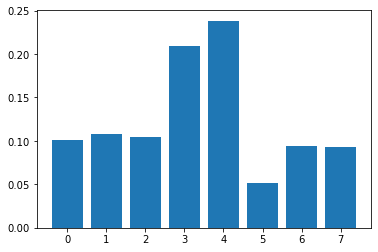

In [19]:
importance2 = rf2.feature_importances_

for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

InPlay            80973
FoulBall          74771
StrikeSwinging    49672
Name: PitchCall, dtype: int64

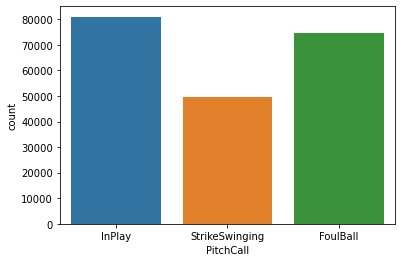

In [20]:
dfSwing = df.loc[(df['PitchCall'] == 'InPlay') | (df['PitchCall'] == 'FoulBall') | (df['PitchCall'] == 'StrikeSwinging'), :]

sns.countplot(dfSwing['PitchCall'])

dfSwing['PitchCall'].value_counts()

In [21]:
def Contact(dfSwing): 
    
    if dfSwing['PitchCall'] == 'InPlay' or dfSwing['PitchCall'] == 'FoulBall':
        return 1
    else: 
        return 0
    
dfSwing['Contact'] = dfSwing[['PitchCall']].apply(Contact,axis=1)

<ipython-input-21-baf5de7a3f14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSwing['Contact'] = dfSwing[['PitchCall']].apply(Contact,axis=1)


In [22]:
ConTarget = np.array(dfSwing['Contact'])

ConFeatures = dfSwing[['RelSpeed','HorzBreak','InducedVertBreak','PlateLocHeight','PlateLocSide_Catcher','BallStrikeVar','RelHeight','Extension']]

ConFeature_list = list(ConFeatures.columns)

Con_Array = np.array(ConFeatures)

train_features3, test_features3, train_labels3, test_labels3 = train_test_split(Con_Array, ConTarget, test_size = 0.80, random_state = 42)

In [23]:
rf3 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf3.fit(train_features3, train_labels3);

predictions3 = rf3.predict_proba(test_features3)

print(predictions3)

[[0.291 0.709]
 [0.253 0.747]
 [0.231 0.769]
 ...
 [0.23  0.77 ]
 [0.874 0.126]
 [0.269 0.731]]


In [24]:
predict_acc3 = rf3.predict(test_features3)
print('Accuracy Score:', metrics.accuracy_score(test_labels3, predict_acc3))

Accuracy Score: 0.7906750317951964


Feature: 0, Score: 0.13074
Feature: 1, Score: 0.11579
Feature: 2, Score: 0.12475
Feature: 3, Score: 0.22580
Feature: 4, Score: 0.13848
Feature: 5, Score: 0.03327
Feature: 6, Score: 0.11783
Feature: 7, Score: 0.11333


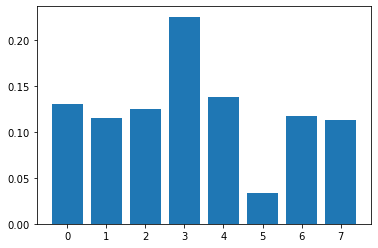

In [25]:
importance3 = rf3.feature_importances_

for i,v in enumerate(importance3):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance3))], importance3)
plt.show()

In [26]:
def Hard_Hit(dfSwing): 
    
    if dfSwing['ExitSpeed'] >= 95:
        return 1
    else: 
        return 0
    
dfSwing['Hard_Hit'] = dfSwing[['ExitSpeed']].apply(Hard_Hit,axis=1)

<ipython-input-26-52148f82abc5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSwing['Hard_Hit'] = dfSwing[['ExitSpeed']].apply(Hard_Hit,axis=1)


In [27]:
HHTarget = np.array(dfSwing['Hard_Hit'])

HHFeatures = dfSwing[['RelSpeed','HorzBreak','InducedVertBreak','PlateLocHeight','PlateLocSide_Catcher','BallStrikeVar','RelHeight','Extension']]

HHFeature_list = list(HHFeatures.columns)

HH_Array = np.array(HHFeatures)

train_features4, test_features4, train_labels4, test_labels4 = train_test_split(HH_Array, HHTarget, test_size = 0.80, random_state = 42)

In [28]:
rf4 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf4.fit(train_features4, train_labels4);

predictions4 = rf4.predict_proba(test_features4)

print(predictions4)

[[0.886 0.114]
 [0.899 0.101]
 [0.937 0.063]
 ...
 [0.803 0.197]
 [1.    0.   ]
 [0.937 0.063]]


In [29]:
predict_acc4 = rf4.predict(test_features4)
print('Accuracy Score:', metrics.accuracy_score(test_labels4, predict_acc4))

Accuracy Score: 0.872563636031716


Feature: 0, Score: 0.13521
Feature: 1, Score: 0.13140
Feature: 2, Score: 0.13460
Feature: 3, Score: 0.15069
Feature: 4, Score: 0.14762
Feature: 5, Score: 0.03905
Feature: 6, Score: 0.13089
Feature: 7, Score: 0.13053


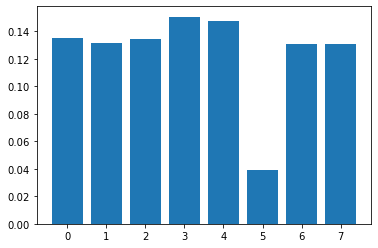

In [30]:
importance4 = rf4.feature_importances_

for i,v in enumerate(importance4):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance4))], importance4)
plt.show()

In [31]:
##Make predictions for entire dataset

predictions11 = rf1.predict_proba(CSFeatures)

print(predictions11)

[[0.71670541 0.28329459]
 [0.71670541 0.28329459]
 [0.71670541 0.28329459]
 ...
 [0.71670541 0.28329459]
 [0.71670541 0.28329459]
 [0.96578969 0.03421031]]


In [32]:
CS = pd.DataFrame(predictions11[:,1], columns=['Called_Strike_Prob'])

In [33]:
dfnew = pd.concat([df, CS], axis=1)
dfnew.head(n=20)

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,cluster,clusterSC,spin_eff_release_est,Count_Favor,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,1.0,2/28/18,13:35:29,1.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,1.0,98.747656,Even Count,1.0,0.0,1.0,1.0,0.0,0.283295
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2.0,2/28/18,13:35:44,1.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,4.0,99.919364,Pitchers Count,0.0,0.0,1.0,1.0,1.0,0.283295
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3.0,2/28/18,13:36:20,2.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,4.0,97.019042,Even Count,0.0,0.0,1.0,1.0,1.0,0.283295
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,4.0,2/28/18,13:36:57,3.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,4.0,96.977944,Even Count,0.0,0.0,1.0,0.0,0.0,0.034210
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5.0,2/28/18,13:37:17,3.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,1.0,97.509975,Hitters Count,0.0,0.0,1.0,1.0,1.0,0.283295
5,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,6.0,2/28/18,13:37:49,4.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,2.0,2.0,30.774201,Even Count,1.0,0.0,1.0,1.0,0.0,0.283295
6,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,7.0,2/28/18,13:39:11,4.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,2.0,5.0,14.449750,Pitchers Count,0.0,0.0,0.0,0.0,1.0,0.005614
7,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,8.0,2/28/18,13:39:41,4.0,3.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,1.0,98.612807,Pitchers Count,0.0,0.0,1.0,0.0,1.0,0.034210
8,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,9.0,2/28/18,13:40:13,4.0,4.0,"Gubelman, Jordan",1.000017e+09,Right,...,4.0,2.0,15.690102,Pitchers Count,0.0,0.0,1.0,1.0,1.0,0.283295
9,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,10.0,2/28/18,13:40:47,4.0,5.0,"Gubelman, Jordan",1.000017e+09,Right,...,4.0,2.0,15.041264,Pitchers Count,1.0,0.0,1.0,1.0,0.0,0.283295


In [34]:
predictions22 = rf2.predict_proba(SwingFeatures)

print(predictions22)

[[0.826 0.174]
 [0.669 0.331]
 [0.34  0.66 ]
 ...
 [0.894 0.106]
 [0.256 0.744]
 [0.298 0.702]]


In [35]:
Swi = pd.DataFrame(predictions22[:,1], columns=['Swing_Prob'])

dfnew = pd.concat([dfnew, Swi], axis=1)
dfnew

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,clusterSC,spin_eff_release_est,Count_Favor,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob,Swing_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,1.0,2/28/18,13:35:29,1.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,98.747656,Even Count,1.0,0.0,1.0,1.0,0.0,0.283295,0.174
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2.0,2/28/18,13:35:44,1.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,4.0,99.919364,Pitchers Count,0.0,0.0,1.0,1.0,1.0,0.283295,0.331
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3.0,2/28/18,13:36:20,2.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,4.0,97.019042,Even Count,0.0,0.0,1.0,1.0,1.0,0.283295,0.660
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,4.0,2/28/18,13:36:57,3.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,4.0,96.977944,Even Count,0.0,0.0,1.0,0.0,0.0,0.034210,0.282
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5.0,2/28/18,13:37:17,3.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,97.509975,Hitters Count,0.0,0.0,1.0,1.0,1.0,0.283295,0.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476327,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,316.0,3/6/20,16:15:05,3.0,1.0,"Domecq, Derek",1.000050e+09,Left,...,3.0,93.789886,Even Count,0.0,0.0,1.0,1.0,0.0,NaN,NaN
476328,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,317.0,3/6/20,16:15:23,3.0,2.0,"Domecq, Derek",1.000050e+09,Left,...,3.0,17.915001,Hitters Count,0.0,0.0,1.0,0.0,0.0,NaN,NaN
476329,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,318.0,3/6/20,16:15:41,3.0,3.0,"Domecq, Derek",1.000050e+09,Left,...,4.0,91.676555,Hitters Count,1.0,0.0,1.0,1.0,0.0,NaN,NaN
476330,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319.0,3/6/20,16:16:04,3.0,4.0,"Domecq, Derek",1.000050e+09,Left,...,5.0,89.498040,Hitters Count,0.0,2.0,1.0,1.0,1.0,NaN,NaN


In [36]:
predictions33 = rf3.predict_proba(ConFeatures)

print(predictions33)

[[0.147 0.853]
 [0.123 0.877]
 [0.124 0.876]
 ...
 [0.75  0.25 ]
 [0.252 0.748]
 [0.401 0.599]]


In [37]:
dfSwing = dfSwing.reset_index(drop=True)

In [38]:
Con = pd.DataFrame(predictions33[:,1], columns=['Con_Prob'])

dfSwing1 = pd.concat([dfSwing, Con], axis=1)
dfSwing1

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,clusterSC,spin_eff_release_est,Count_Favor,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Contact,Con_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2,2/28/18,13:35:44,1,2,"Gubelman, Jordan",1000017258,Right,...,4.0,99.919364,Pitchers Count,0,0,1,1,1,1,0.853
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3,2/28/18,13:36:20,2,1,"Gubelman, Jordan",1000017258,Right,...,4.0,97.019042,Even Count,0,0,1,1,1,1,0.877
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5,2/28/18,13:37:17,3,2,"Gubelman, Jordan",1000017258,Right,...,1.0,97.509975,Hitters Count,0,0,1,1,1,1,0.876
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,7,2/28/18,13:39:11,4,2,"Gubelman, Jordan",1000017258,Right,...,5.0,14.449750,Pitchers Count,0,0,0,0,1,0,0.027
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,8,2/28/18,13:39:41,4,3,"Gubelman, Jordan",1000017258,Right,...,1.0,98.612807,Pitchers Count,0,0,1,0,1,1,0.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205411,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 05,310,3/6/20,16:11:00,5,9,"Kochanski, Brett",1000058689,Right,...,3.0,73.079950,Hitters Count,0,6,1,1,1,1,0.969
205412,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 01,311,3/6/20,16:13:13,1,1,"Domecq, Derek",1000049572,Left,...,5.0,91.923848,Even Count,0,0,1,0,1,1,0.426
205413,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 02,314,3/6/20,16:14:20,2,3,"Domecq, Derek",1000049572,Left,...,3.0,16.489243,Even Count,0,1,0,0,1,0,0.250
205414,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319,3/6/20,16:16:04,3,4,"Domecq, Derek",1000049572,Left,...,5.0,89.498040,Hitters Count,0,2,1,1,1,1,0.748


In [39]:
predictions44 = rf4.predict_proba(HHFeatures)

print(predictions44)

[[0.806 0.194]
 [0.867 0.133]
 [0.904 0.096]
 ...
 [0.984 0.016]
 [0.894 0.106]
 [0.959 0.041]]


In [40]:
HH = pd.DataFrame(predictions44[:,1], columns=['HardHit_Prob'])

dfSwing2 = pd.concat([dfSwing1, HH], axis=1)
dfSwing2

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,spin_eff_release_est,Count_Favor,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Contact,Con_Prob,HardHit_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2,2/28/18,13:35:44,1,2,"Gubelman, Jordan",1000017258,Right,...,99.919364,Pitchers Count,0,0,1,1,1,1,0.853,0.194
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3,2/28/18,13:36:20,2,1,"Gubelman, Jordan",1000017258,Right,...,97.019042,Even Count,0,0,1,1,1,1,0.877,0.133
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5,2/28/18,13:37:17,3,2,"Gubelman, Jordan",1000017258,Right,...,97.509975,Hitters Count,0,0,1,1,1,1,0.876,0.096
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,7,2/28/18,13:39:11,4,2,"Gubelman, Jordan",1000017258,Right,...,14.449750,Pitchers Count,0,0,0,0,1,0,0.027,0.002
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 04,8,2/28/18,13:39:41,4,3,"Gubelman, Jordan",1000017258,Right,...,98.612807,Pitchers Count,0,0,1,0,1,1,0.612,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205411,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 05,310,3/6/20,16:11:00,5,9,"Kochanski, Brett",1000058689,Right,...,73.079950,Hitters Count,0,6,1,1,1,1,0.969,0.071
205412,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 01,311,3/6/20,16:13:13,1,1,"Domecq, Derek",1000049572,Left,...,91.923848,Even Count,0,0,1,0,1,1,0.426,0.053
205413,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 02,314,3/6/20,16:14:20,2,3,"Domecq, Derek",1000049572,Left,...,16.489243,Even Count,0,1,0,0,1,0,0.250,0.016
205414,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319,3/6/20,16:16:04,3,4,"Domecq, Derek",1000049572,Left,...,89.498040,Hitters Count,0,2,1,1,1,1,0.748,0.106


In [41]:
dfProb = dfSwing2[['Contact','Con_Prob','HardHit_Prob','PitchUID']]

In [42]:
finaldf = dfnew.merge(dfProb,how='left', on='PitchUID')
finaldf

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob,Swing_Prob,Contact,Con_Prob,HardHit_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,1.0,2/28/18,13:35:29,1.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,0.0,1.0,1.0,0.0,0.283295,0.174,NaN,NaN,NaN
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2.0,2/28/18,13:35:44,1.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.331,1.0,0.853,0.194
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3.0,2/28/18,13:36:20,2.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.660,1.0,0.877,0.133
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,4.0,2/28/18,13:36:57,3.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,0.0,0.0,0.034210,0.282,NaN,NaN,NaN
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5.0,2/28/18,13:37:17,3.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.824,1.0,0.876,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476314,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,316.0,3/6/20,16:15:05,3.0,1.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
476315,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,317.0,3/6/20,16:15:23,3.0,2.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
476316,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,318.0,3/6/20,16:15:41,3.0,3.0,"Domecq, Derek",1.000050e+09,Left,...,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
476317,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319.0,3/6/20,16:16:04,3.0,4.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,0.748,0.106


In [43]:
dfthreeballs = df.loc[(df.Balls == 3) & (df.Strikes == 0)]
dfthreeballs

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,HotColdPoints,cluster,clusterSC,spin_eff_release_est,Count_Favor,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin
13,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 01,14,2/28/18,13:44:04,1,4,"Alsbrooks, Quentin",1000026322,Right,...,NaN,1.0,1.0,99.847289,Hitters Count,0,0,1,1,0
26,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 05,27,2/28/18,13:49:54,5,4,"Alsbrooks, Quentin",1000026322,Right,...,NaN,3.0,4.0,99.267998,Hitters Count,0,0,1,0,0
49,20180228-TaylorStadium-1,20180228-TaylorStadium-1 02) 01,50,2/28/18,14:03:19,1,4,"Alsbrooks, Quentin",1000026322,Right,...,NaN,3.0,4.0,96.541887,Hitters Count,0,0,1,0,0
79,20180228-TaylorStadium-1,20180228-TaylorStadium-1 03( 03,81,2/28/18,14:19:27,3,4,"Gubelman, Jordan",1000017258,Right,...,NaN,3.0,4.0,98.170048,Hitters Count,0,0,0,1,0
144,20180228-TaylorStadium-1,20180228-TaylorStadium-1 04) 07,146,2/28/18,14:57:46,7,4,"Alsbrooks, Quentin",1000026322,Right,...,NaN,3.0,4.0,68.544550,Hitters Count,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475868,20200306-UNebraska-1,20200306-UNebraska-1 04) 01,123,3/6/20,14:47:25,1,4,"Black, Billy",1000057087,Right,...,NaN,1.0,1.0,98.350808,Hitters Count,1,0,1,1,0
476043,20200306-CarterMemorial-1,20200306-CarterMemorial-1 01) 03,30,3/6/20,13:28:28,3,4,"Warner, Kyle",10000332,Left,...,NaN,1.0,5.0,97.529258,Hitters Count,0,0,1,1,0
476158,20200306-CarterMemorial-1,20200306-CarterMemorial-1 04) 02,145,3/6/20,14:33:45,2,4,"Barberio, Joe",1000078637,Right,...,NaN,1.0,4.0,88.728751,Hitters Count,0,0,1,0,0
476283,20200306-CarterMemorial-1,20200306-CarterMemorial-1 07) 10,272,3/6/20,15:49:44,10,4,"Yankowski, David",1000056119,Right,...,NaN,3.0,4.0,71.878450,Hitters Count,0,0,1,1,1


In [44]:
#Removed all 3 ball counts

finaldf = finaldf[~finaldf.PitchUID.isin(dfthreeballs.PitchUID)]
finaldf

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,Called_Strike,BallStrikeVar,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob,Swing_Prob,Contact,Con_Prob,HardHit_Prob
0,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,1.0,2/28/18,13:35:29,1.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,1.0,0.0,1.0,1.0,0.0,0.283295,0.174,NaN,NaN,NaN
1,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 01,2.0,2/28/18,13:35:44,1.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.331,1.0,0.853,0.194
2,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 02,3.0,2/28/18,13:36:20,2.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.660,1.0,0.877,0.133
3,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,4.0,2/28/18,13:36:57,3.0,1.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,0.0,0.0,0.034210,0.282,NaN,NaN,NaN
4,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01( 03,5.0,2/28/18,13:37:17,3.0,2.0,"Gubelman, Jordan",1.000017e+09,Right,...,0.0,0.0,1.0,1.0,1.0,0.283295,0.824,1.0,0.876,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476314,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,316.0,3/6/20,16:15:05,3.0,1.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
476315,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,317.0,3/6/20,16:15:23,3.0,2.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
476316,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,318.0,3/6/20,16:15:41,3.0,3.0,"Domecq, Derek",1.000050e+09,Left,...,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
476317,20200306-CarterMemorial-1,20200306-CarterMemorial-1 09( 03,319.0,3/6/20,16:16:04,3.0,4.0,"Domecq, Derek",1.000050e+09,Left,...,0.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,0.748,0.106


In [45]:
finaldf2 = finaldf.groupby('Batter').filter(lambda x: len(x) >= 100)

In [46]:
def SDS(finaldf2):
    
    if finaldf2['Swing'] == False:
        return ((1-finaldf2['Exp.Called.Strike'])- finaldf2['Exp.Called.Strike']-finaldf2['Swing_Prob'])
    elif finaldf2['Swing'] == True and finaldf2['Strikes'] == 2:
        return (finaldf2['Exp.Called.Strike'] - (1-finaldf2['Exp.Called.Strike']) + finaldf2['Swing_Prob'])
    else:
                return (finaldf2['Exp.Called.Strike'] - (1-finaldf2['Exp.Called.Strike']) + finaldf2['Swing_Prob'] + finaldf2['HardHit_Prob'])
    
finaldf2['SDS'] = finaldf2[['Swing','Exp.Called.Strike','Swing_Prob','HardHit_Prob','Strikes']].apply(SDS,axis=1)

In [47]:
finaldf2['SDS'].isna().sum()

1786

In [48]:
meanSDS = finaldf2['SDS'].mean()
meanSDS

0.34742135628138265

In [49]:
def SDSPlus(finaldf2):
    return ((finaldf2['SDS']) / meanSDS) * 100
      
finaldf2['SDSPlus'] = finaldf2[['SDS']].apply(SDSPlus,axis=1)

In [50]:
finaldf2

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob,Swing_Prob,Contact,Con_Prob,HardHit_Prob,SDS,SDSPlus
10,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 01,11.0,2/28/18,13:43:21,1.0,1.0,"Alsbrooks, Quentin",1.000026e+09,Right,...,1.0,0.0,0.0,0.034210,0.133,NaN,NaN,NaN,0.844694,243.132400
11,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 01,12.0,2/28/18,13:43:34,1.0,2.0,"Alsbrooks, Quentin",1.000026e+09,Right,...,1.0,0.0,0.0,0.034210,0.021,NaN,NaN,NaN,1.048141,301.691652
12,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 01,13.0,2/28/18,13:43:50,1.0,3.0,"Alsbrooks, Quentin",1.000026e+09,Right,...,1.0,0.0,0.0,0.034210,0.107,NaN,NaN,NaN,0.742513,213.721126
14,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 02,15.0,2/28/18,13:44:41,2.0,1.0,"Alsbrooks, Quentin",1.000026e+09,Right,...,1.0,1.0,0.0,0.283295,0.701,NaN,NaN,NaN,-1.622481,-467.006704
15,20180228-TaylorStadium-1,20180228-TaylorStadium-1 01) 02,16.0,2/28/18,13:45:21,2.0,2.0,"Alsbrooks, Quentin",1.000026e+09,Right,...,1.0,1.0,0.0,0.283295,0.101,NaN,NaN,NaN,-0.203462,-58.563517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476295,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 04,296.0,3/6/20,16:05:18,4.0,1.0,"Kochanski, Brett",1.000059e+09,Right,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476296,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 04,297.0,3/6/20,16:05:35,4.0,2.0,"Kochanski, Brett",1.000059e+09,Right,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476297,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 04,298.0,3/6/20,16:05:56,4.0,3.0,"Kochanski, Brett",1.000059e+09,Right,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476299,20200306-CarterMemorial-1,20200306-CarterMemorial-1 08) 04,300.0,3/6/20,16:06:35,4.0,5.0,"Kochanski, Brett",1.000059e+09,Right,...,1.0,0.0,1.0,NaN,NaN,1.0,0.62,0.089,NaN,NaN


In [51]:
finaldf3 = finaldf2[finaldf2['BatterTeam'] == 'WAK_DEA']
finaldf3

,GameID,PlayID,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,...,X_Location,Y_Location,Swing_Bin,Called_Strike_Prob,Swing_Prob,Contact,Con_Prob,HardHit_Prob,SDS,SDSPlus
8002,20180307-SpringsBrooksStadium-1,20180307-SpringsBrooksStadium-1 01( 01,1.0,3/7/18,16:04:29,1.0,1.0,"Simonelli, Anthony",1.000017e+09,Right,...,1.0,1.0,0.0,0.283295,0.150,NaN,NaN,NaN,-0.811803,-233.665269
8003,20180307-SpringsBrooksStadium-1,20180307-SpringsBrooksStadium-1 01( 01,2.0,3/7/18,16:04:43,1.0,2.0,"Simonelli, Anthony",1.000017e+09,Right,...,1.0,1.0,0.0,0.283295,0.586,NaN,NaN,NaN,-0.933572,-268.714663
8004,20180307-SpringsBrooksStadium-1,20180307-SpringsBrooksStadium-1 01( 01,3.0,3/7/18,16:05:00,1.0,3.0,"Simonelli, Anthony",1.000017e+09,Right,...,0.0,0.0,0.0,0.283295,0.760,NaN,NaN,NaN,0.442333,127.319023
8005,20180307-SpringsBrooksStadium-1,20180307-SpringsBrooksStadium-1 01( 01,4.0,3/7/18,16:05:14,1.0,4.0,"Simonelli, Anthony",1.000017e+09,Right,...,1.0,1.0,0.0,0.283295,0.402,NaN,NaN,NaN,0.239023,68.799304
8006,20180307-SpringsBrooksStadium-1,20180307-SpringsBrooksStadium-1 01( 01,5.0,3/7/18,16:05:29,1.0,5.0,"Simonelli, Anthony",1.000017e+09,Right,...,1.0,1.0,1.0,0.034210,0.020,1.0,0.797,0.077,0.241397,69.482368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472387,20200306-GeneHooksField-1,20200306-GeneHooksField-1 09) 02,306.0,3/6/20,21:08:07,2.0,4.0,"Kirian, Michael",1.000027e+09,Left,...,1.0,0.0,0.0,0.283295,0.452,NaN,NaN,NaN,0.439733,126.570419
472388,20200306-GeneHooksField-1,20200306-GeneHooksField-1 09) 03,307.0,3/6/20,21:08:43,3.0,1.0,"Kirian, Michael",1.000027e+09,Left,...,1.0,0.0,0.0,0.069631,0.285,NaN,NaN,NaN,0.711405,204.767234
472389,20200306-GeneHooksField-1,20200306-GeneHooksField-1 09) 03,308.0,3/6/20,21:09:03,3.0,2.0,"Kirian, Michael",1.000027e+09,Left,...,1.0,1.0,0.0,0.283295,0.864,NaN,NaN,NaN,-1.726849,-497.047527
472390,20200306-GeneHooksField-1,20200306-GeneHooksField-1 09) 03,309.0,3/6/20,21:09:25,3.0,3.0,"Kirian, Michael",1.000027e+09,Left,...,1.0,1.0,0.0,0.034210,0.280,NaN,NaN,NaN,-1.052087,-302.827475


In [52]:
SDShitters = finaldf2['SDS'].groupby(finaldf2['Batter']).mean().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SDShitters)

Batter
Jones, Leonard            0.662322
Brown, Luke               0.589115
Ando, Royce Hyatt         0.567058
Stephenson, Luke          0.566276
Matheny, Garrett          0.565794
Ward, Ryan                0.564263
Hunter, Skyler            0.558255
Bertrand, Easton          0.558108
Dee, Alex                 0.556062
Tresh, Luca               0.542180
King, Riley               0.540303
Torres, Jose              0.538876
Mitchell, Garrett         0.535490
Houston, Jeremy           0.535352
Chick, Cam                0.527324
Berryhill, Luke           0.526523
Bradley, Tucker           0.526453
Estes, Jay                0.525205
Plantier, Tyler           0.524379
Holladay, Jordan          0.521099
Raabe, Zack               0.518817
Lau, Everett              0.511283
Jones, Hayden             0.509001
Thomas, Matt              0.508509
Davis, Henry              0.504110
Olenek, Ryan              0.504081
Owens, Sam                0.503358
Yeager, RJ                0.501800
McGowan, Kend

In [53]:
SDSPlushitters = finaldf2['SDSPlus'].groupby(finaldf2['Batter']).mean().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SDSPlushitters)

Batter
Jones, Leonard            190.639364
Brown, Luke               169.568015
Ando, Royce Hyatt         163.219103
Stephenson, Luke          162.994036
Matheny, Garrett          162.855398
Ward, Ryan                162.414609
Hunter, Skyler            160.685231
Bertrand, Easton          160.643057
Dee, Alex                 160.054005
Tresh, Luca               156.058225
King, Riley               155.518059
Torres, Jose              155.107407
Mitchell, Garrett         154.132816
Houston, Jeremy           154.092859
Chick, Cam                151.782395
Berryhill, Luke           151.551644
Bradley, Tucker           151.531633
Estes, Jay                151.172348
Plantier, Tyler           150.934628
Holladay, Jordan          149.990557
Raabe, Zack               149.333781
Lau, Everett              147.165225
Jones, Hayden             146.508310
Thomas, Matt              146.366750
Davis, Henry              145.100399
Olenek, Ryan              145.092191
Owens, Sam                144.8

In [54]:
SDSPlusTeam = finaldf2['SDSPlus'].groupby(finaldf2['BatterTeam']).mean().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SDSPlusTeam)

BatterTeam
EKU_COL      287.469942
YOU_HAR      191.919293
GEO_PAN      154.994809
WM_TRI       153.352568
MTSU_BLU     141.713989
HAR_CRI      132.552381
CAN_GRI      130.733919
ORA_GOL      130.639209
PUR_BOI      129.669224
TEN_TEC      128.079816
NEV_WOL      127.104442
SBU_SEA      126.926295
CAL_LAN      126.899966
MIN_GOL      125.188319
CAL_HIG      122.898757
BRY_BUL      122.591506
SOU_GAM      122.224437
WMI_BRO      121.929784
LIT_TRO      120.561632
UWM_PAN      117.886278
KS_GF        115.079070
GEO_BUL      114.724202
UTA_WOL      114.311835
GEO_EAG      114.159590
GAR_RUN      113.965550
ASU_RED      113.404000
BYU_COU      112.656772
YSU_PEN      112.283764
GON_BUL      111.294754
USF_BUL      111.276350
NEB          111.163817
LON_DIR      110.563185
WIN_EAG      110.552564
OLE_REB      110.388209
APP_MOU      110.178643
LOU_CAR      109.856489
PEN_NIT      109.790488
AUB_TIG      109.195188
MSU_BDG      109.100912
VAN_COM      108.731295
LSU_TIG      108.696511
STA_C

In [ ]:
SDSWake = finaldf3['SDS'].groupby(finaldf3['Batter']).mean().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SDSWake)

In [ ]:
SDSPlusWake = finaldf3['SDSPlus'].groupby(finaldf3['Batter']).mean().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SDSPlusWake)

In [ ]:
SDSdf = pd.DataFrame(SDSPlushitters)
SDSdf

In [ ]:
datatypes = finaldf.dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(datatypes)


In [ ]:
df4 = pd.read_csv(r'/Users/user/Downloads/advanced_hitting_stats.csv', sep=",")
df4

In [ ]:
df5 = df4[df4['year'] == 2018]
df6 = df4[df4['year'] == 2019]
df7 = df4[df4['year'] == 2020]

In [ ]:
dief = pd.merge(df6, SDSdf, left_on='name', right_on='Batter')
dief